# Preparation

## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from zipfile import ZipFile

## Import Data

In [2]:
with ZipFile('big-startup-secsees-fail-dataset-from-crunchbase.zip') as raw_zip:
    raw_zip.extractall(path='datasets')
    
    raw_data = pd.read_csv('datasets/big_startup_secsees_dataset.csv')

In [3]:
raw_data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


# Exploratory Data Analysis

## Data Counts

In [4]:
raw_data.shape

(66368, 14)

## Data Fields Information

In [5]:
raw_data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

1. permalink: Link to Organization
2. name: Company Name
3. homepage_url: Startup Site
4. category_list: Field of company
5. funding_total_usd: Total Funding in USD
6. status: Operating Status
7. country_code: Country Code
8. state_code: State Code of company location
9. region: Region of company location
10. city: Cit of company location
11. funding_rounds: the number of times a startup opts to raise capital from the market.
12. founded_at: the date when the startup is founded
13. first_funding_at: the date when the startup get first funding
14. last_funding_at: the date when the startup get last funding

## Visualize the Target Data (Status)

<Axes: >

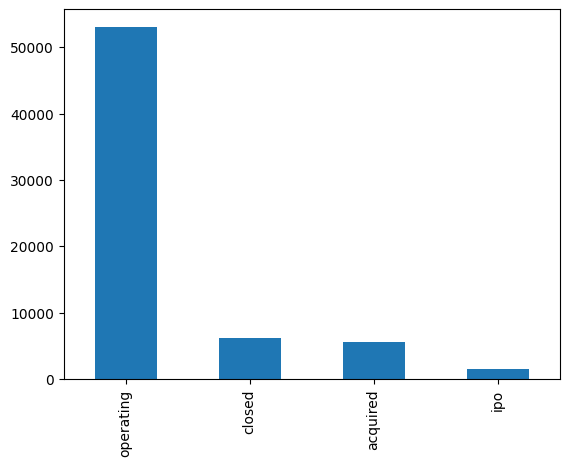

In [6]:
raw_data['status'].value_counts().plot(kind='bar')

Our objective is to find whether the startup will fail (closed) or success (acquier/ipo), so **we don't need operating status. We will drop these rows.**

In [7]:
success_startup = np.logical_or(raw_data['status'] == 'ipo', raw_data['status'] == 'acquired')
fail_startup = raw_data['status'] == 'closed'

raw_data['status'][fail_startup] = 'fail'
raw_data['status'][success_startup] = 'success'

/tmp/ipykernel_27369/516772136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['status'][fail_startup] = 'fail'
/tmp/ipykernel_27369/516772136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['status'][success_startup] = 'success'


In [8]:
valid_index = (~(raw_data['status'] == 'operating'))

raw_data = raw_data[valid_index]

raw_data

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,2535000,success,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,1250000,success,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000,success,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66349,/organization/zyncro,Zyncro,http://www.zyncro.com,Cloud Computing|Enterprise 2.0|Enterprise Soft...,3805520,success,ESP,56,Barcelona,Barcelona,2,2009-09-01,2011-04-05,2012-02-03
66350,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,Pharmaceuticals,13000000,success,USA,PA,Philadelphia,Radnor,1,2014-01-01,2014-10-14,2014-10-14
66352,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,866550786,success,USA,CA,SF Bay Area,San Francisco,9,2007-07-01,2007-01-01,2011-02-18
66358,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,15419877,fail,MYS,14,MYS - Other,Damansara New Village,4,1994-01-01,2008-01-01,2013-02-15


<Axes: >

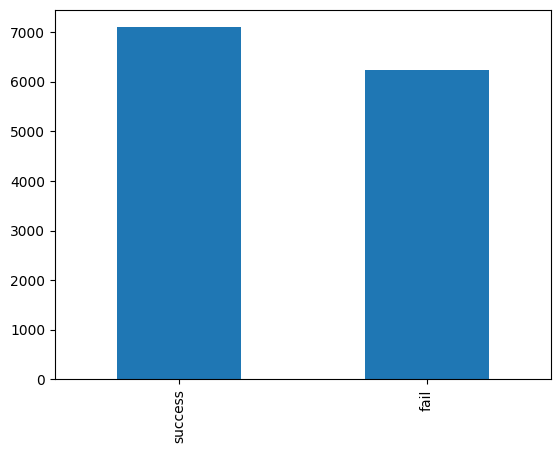

In [9]:
raw_data['status'].value_counts().plot(kind='bar')

## Check Duplicate Startup Name

In [10]:
check_name = raw_data['name'].value_counts()

check_name[check_name > 1]

SpaceConnect              2
SquareOne                 2
Stream                    2
Bloodhound                2
Stupsr                    2
Cardiovascular Systems    2
SHIFT                     2
Archive                   2
Name: name, dtype: int64

There are 8 duplicated startup name, lets check wheter the startup has the same name or the data is just duplicated by checking the permalink column.

In [11]:
duplicate_name = check_name[check_name > 1].index

duplicate_inspect = raw_data[raw_data['name'].str.fullmatch('|'.join(duplicate_name)) == True]

duplicate_inspect[['permalink', 'name']]

,permalink,name
4120,/organization/archive,Archive
4121,/organization/archive-2,Archive
7537,/organization/bloodhound,Bloodhound
7538,/organization/bloodhound-2,Bloodhound
9738,/organization/cardiovascular-systems,Cardiovascular Systems
9739,/organization/cardiovascular-systems-incorporated,Cardiovascular Systems
51149,/organization/shift,SHIFT
51151,/organization/shift-4,SHIFT
53581,/organization/spaceconnect,SpaceConnect
53582,/organization/spaceconnect-2,SpaceConnect


Lets check the uniqueness of permalink column.

In [12]:
duplicate_inspect[['permalink', 'name']].nunique()

permalink    16
name          8
dtype: int64

The permalink is unique! However, one thing that bother me is that some of the duplicated startup name have similiar permalink, for example '3DIVAZ' startup have permalink '/organization/3divaz-2' and '/organization/3divaz-3', it could be that the data was inputed two times and the permalink is set to unique in the beginning, hence it automatically iterate the permalink name if the input data is same. But it is just speculation, we don't have enough information about the data. **So for now lets assume these startup coincidentally have the same name.**

## Check Data Types

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13334 entries, 15 to 66360
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          13334 non-null  object
 1   name               13333 non-null  object
 2   homepage_url       12117 non-null  object
 3   category_list      12248 non-null  object
 4   funding_total_usd  13334 non-null  object
 5   status             13334 non-null  object
 6   country_code       11343 non-null  object
 7   state_code         11125 non-null  object
 8   region             11182 non-null  object
 9   city               11182 non-null  object
 10  funding_rounds     13334 non-null  int64 
 11  founded_at         9602 non-null   object
 12  first_funding_at   13332 non-null  object
 13  last_funding_at    13334 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.5+ MB


**The funding_total_usd data type is wrong, it should be float.** Lets check how many data that have '-' element, then convert it into numeric data.

In [14]:
(raw_data['funding_total_usd'] == '-').value_counts()

False    11143
True      2191
Name: funding_total_usd, dtype: int64

In [15]:
raw_data['funding_total_usd'] = pd.to_numeric(
    arg=raw_data['funding_total_usd'],
    errors='coerce',
    downcast='float'
)

raw_data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000.0,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000.0,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,2535000.0,success,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,1250000.0,success,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000.0,success,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08


Lets check again the NaN value after the conversion.

In [16]:
raw_data['funding_total_usd'].isna().value_counts()

False    11143
True      2191
Name: funding_total_usd, dtype: int64

It's fit with our assumption if non-numeric data only contains '-', hence we can conclude that all non-numeric data is '-', not number with string (e.g. 10 mil usd).

## Visualize Data Distribution

### Numeric Data

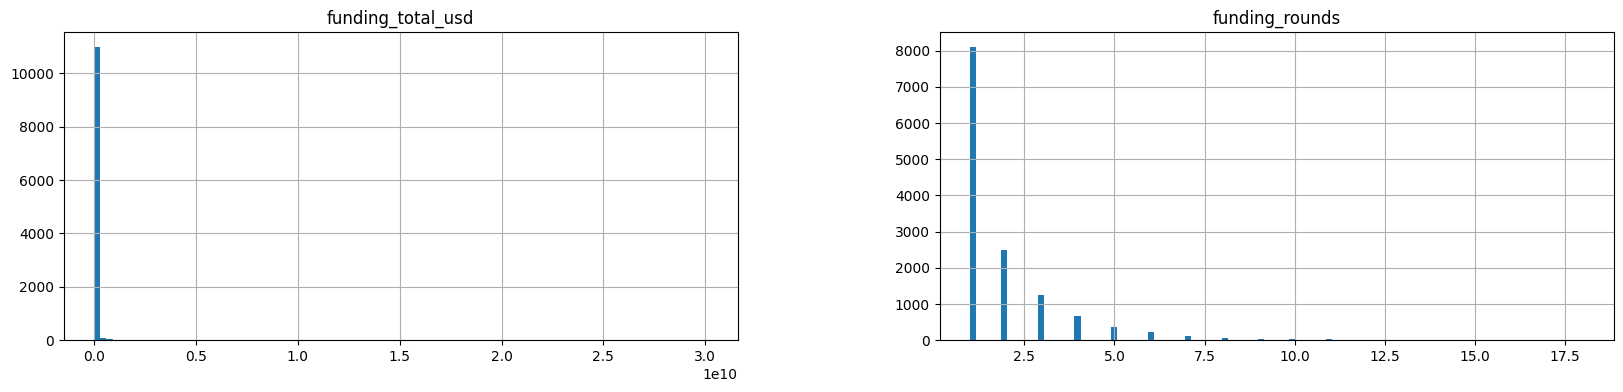

In [17]:
raw_data.hist(bins=100, figsize=(20, 4))

plt.show()

### Numeric Data Based on Success Startup

array([[<Axes: title={'center': 'funding_total_usd'}>,
        <Axes: title={'center': 'funding_rounds'}>]], dtype=object)

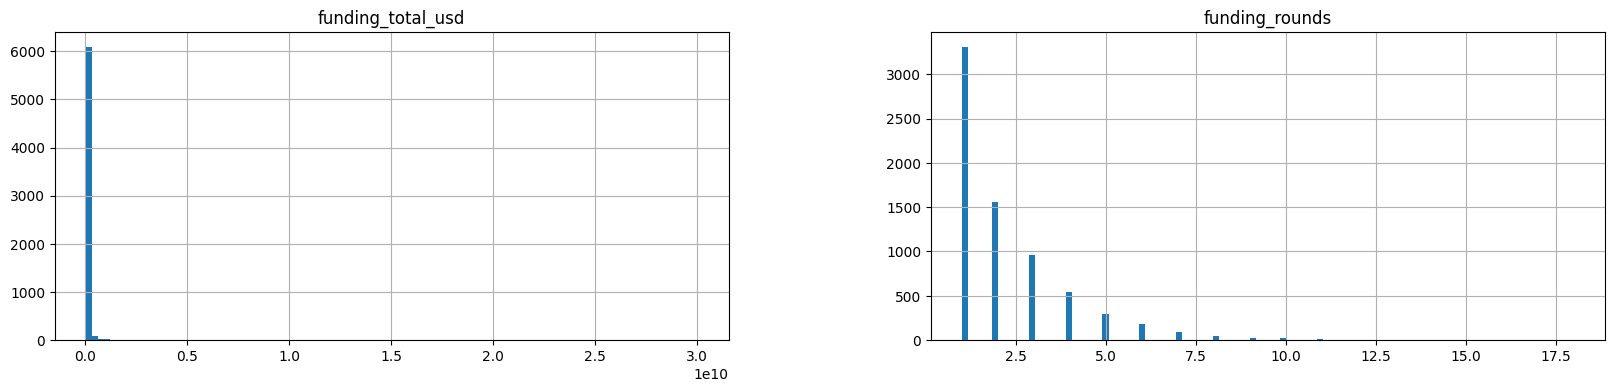

In [18]:
success_startup = raw_data[raw_data['status']=='success']

success_startup.hist(bins=100, figsize=(20, 4))

### Numeric Data Based on Fail Startup

array([[<Axes: title={'center': 'funding_total_usd'}>,
        <Axes: title={'center': 'funding_rounds'}>]], dtype=object)

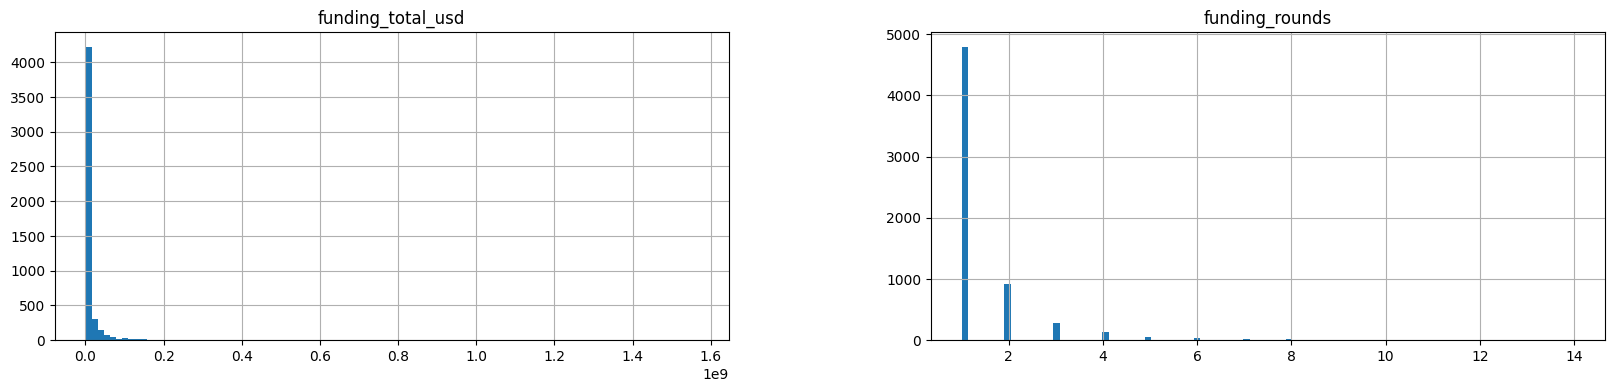

In [19]:
fail_startup = raw_data[raw_data['status']=='fail']

fail_startup.hist(bins=100, figsize=(20, 4))

The funding_total_usd column distribution is hard to see, since it has a lot of outliers. So lets inspect the funding_total_usd column.

In [20]:
raw_data['funding_total_usd'].describe()

count    1.114300e+04
mean     3.580863e+07
std      3.687556e+08
min      2.000000e+00
25%      1.000000e+06
50%      5.800000e+06
75%      2.200000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

**The minimum value is 2 usd, which is doesn't make any sense**, there is no way someone is funding a startup by 2 usd (it could be an invalid input). Lets check it further by using interquartile rule to find outliers.

In [21]:
def find_outliers(data):
    data = np.array(data.dropna())
    
    inter_quant = np.quantile(data, 0.75) - np.quantile(data, 0.25)
    
    upper_bound = np.quantile(data, 0.75) + 1.5*inter_quant
    lower_bound = np.quantile(data, 0.25) - 1.5*inter_quant
    
    lower_outliers = data < lower_bound
    upper_outliers = data > upper_bound
    
    return pd.Series(lower_outliers | upper_outliers)

In [22]:
outliers = find_outliers(raw_data['funding_total_usd'])


outliers

0        False
1        False
2        False
3        False
4        False
         ...  
11138    False
11139    False
11140     True
11141    False
11142    False
Length: 11143, dtype: bool

Lets check if our desired outliers (small number) still exist or not.

In [23]:
raw_data[['funding_total_usd']].dropna().reset_index(drop=True)[~outliers].describe()

,funding_total_usd
count,9.855000e+03
mean,9.508785e+06
std,1.222009e+07
min,2.000000e+00
25%,7.000000e+05
50%,4.000000e+06
75%,1.398045e+07
max,5.350000e+07


Nope, **the interquartile method just remove the upper outliers. Which is in this context, it still possible for startup to get up to $1x10^{10}$ usd fund, so lets keep the upper bound outliers.** We will consider another method to remove lower bound outliers. **Let set a threshold for 1000 usd, it means anything under 1000 usd fund considered as invalid input.**

In [24]:
valid_input = ~(raw_data['funding_total_usd'] < 1000)

raw_data[['funding_total_usd']][valid_input]

,funding_total_usd
15,5000000.0
20,500000.0
23,2535000.0
31,1250000.0
32,35000000.0
...,...
66349,3805520.0
66350,13000000.0
66352,866550786.0
66358,15419877.0


**Lets drop the row that has invalid input in funding_total_usd column.**

In [25]:
invalid_input_id = raw_data[['funding_total_usd']][~valid_input].index

invalid_input_id

Int64Index([6371, 6487, 55916, 66220], dtype='int64')

In [26]:
raw_data = raw_data.drop(
    invalid_input_id,
    errors='ignore'
)

Lets visualize the distribution.

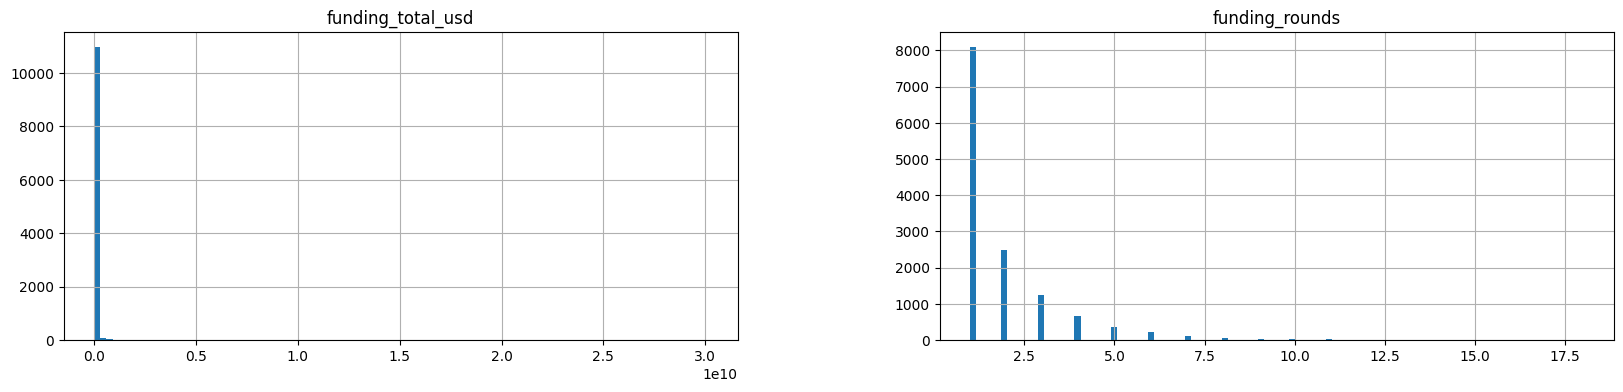

In [27]:
raw_data.hist(
    bins=100,
    figsize=(20, 4)
)

plt.show()

It still not clear what happened with the distribution (we just eliminate the lower bound outliers, where the main problem of unclear visualization is the upper bound outliers). Lets Continue to the categorical data.

### Datetime Data

In [28]:
temp_df = raw_data[['name', 'founded_at', 'first_funding_at', 'last_funding_at', 'status']]

for item in (['founded_at', 'first_funding_at', 'last_funding_at']):
    temp_df[item] = pd.to_datetime(raw_data[item], errors='coerce')

/tmp/ipykernel_27369/1121020916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[item] = pd.to_datetime(raw_data[item], errors='coerce')
/tmp/ipykernel_27369/1121020916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[item] = pd.to_datetime(raw_data[item], errors='coerce')
/tmp/ipykernel_27369/1121020916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

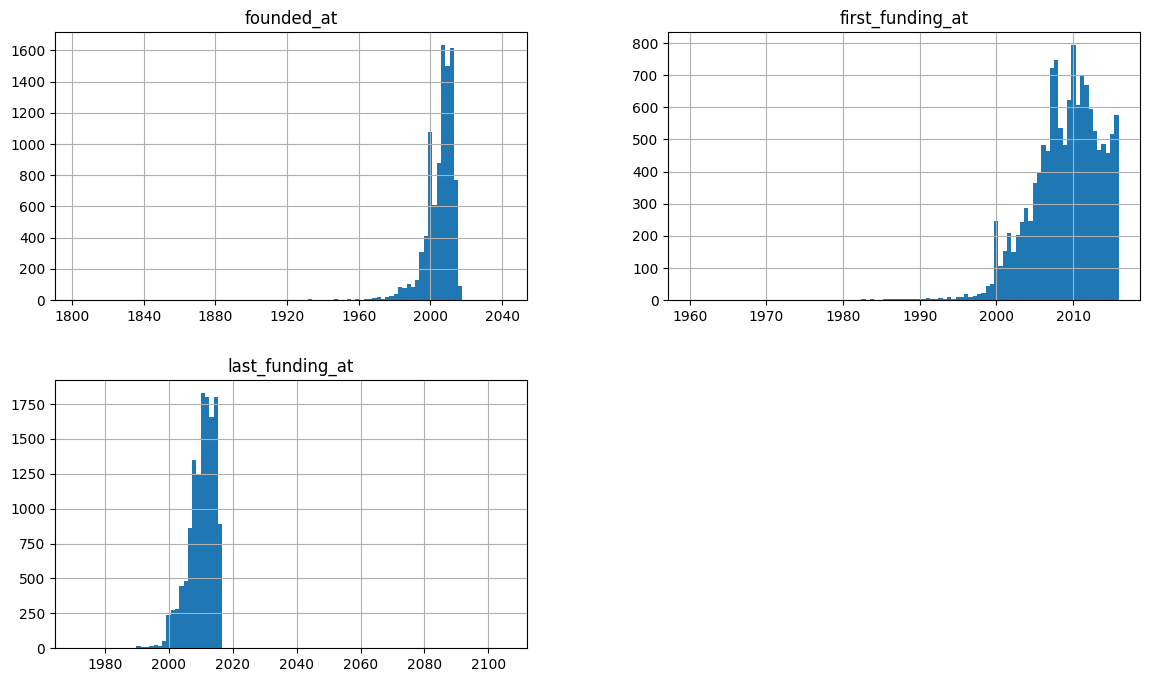

In [29]:
temp_df.hist(
    bins=100,
    figsize=(14, 8)
)

plt.show()

It look a like **there is date that is greater than today (2023).** Lets change it to *None*.

In [30]:
for item in (['founded_at', 'first_funding_at', 'last_funding_at']):
    temp_df[item][(temp_df[temp_df[item].dt.year > 2023]).index] = None

/tmp/ipykernel_27369/804943066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[item][(temp_df[temp_df[item].dt.year > 2023]).index] = None
/tmp/ipykernel_27369/804943066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[item][(temp_df[temp_df[item].dt.year > 2023]).index] = None
/tmp/ipykernel_27369/804943066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[item][(temp_df[temp_df[item].dt.year > 2023]).

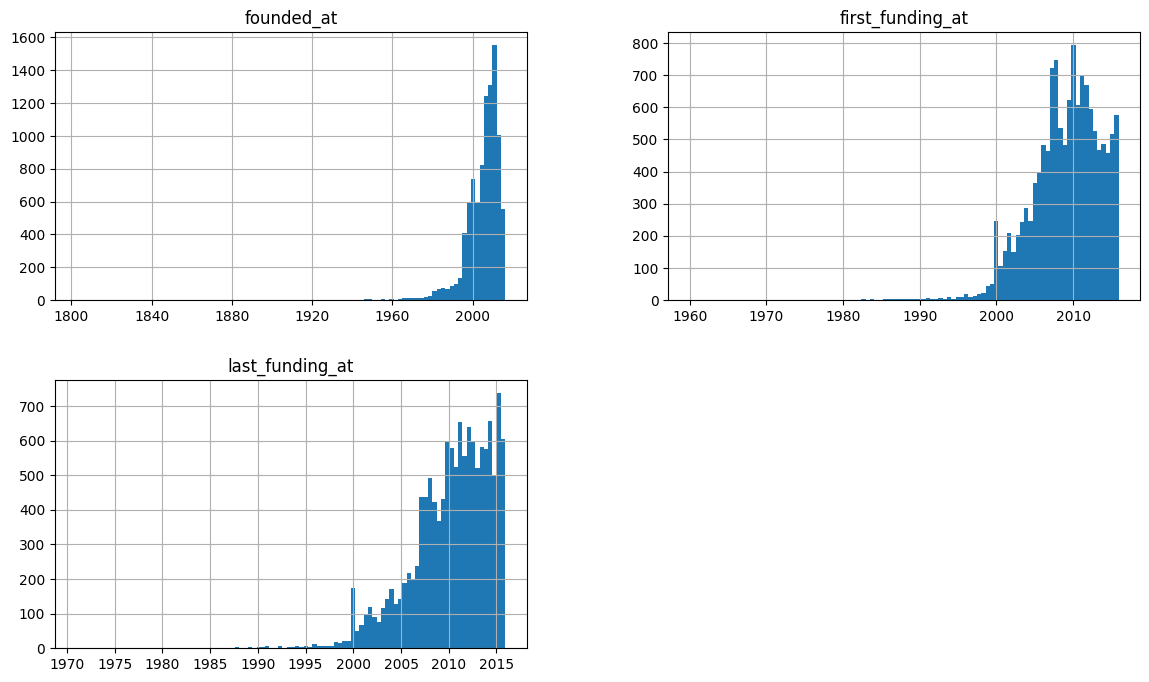

In [31]:
temp_df.hist(
    bins=100,
    figsize=(14, 8)
)

plt.show()

In [32]:
temp_df.describe()

/tmp/ipykernel_27369/1505501050.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  temp_df.describe()
/tmp/ipykernel_27369/1505501050.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  temp_df.describe()
/tmp/ipykernel_27369/1505501050.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  temp_df.describe()


,name,founded_at,first_funding_at,last_funding_at,status
count,13329,9596,13328,13329,13330
unique,13321,1634,3789,3665,2
top,SpaceConnect,2007-01-01 00:00:00,2008-01-01 00:00:00,2008-01-01 00:00:00,success
freq,2,342,171,130,7096
first,NaN,1802-07-19 00:00:00,1960-01-01 00:00:00,1971-01-01 00:00:00,NaN
last,NaN,2016-04-02 00:00:00,2015-12-04 00:00:00,2015-12-04 00:00:00,NaN


### Range Founded and Funding Date

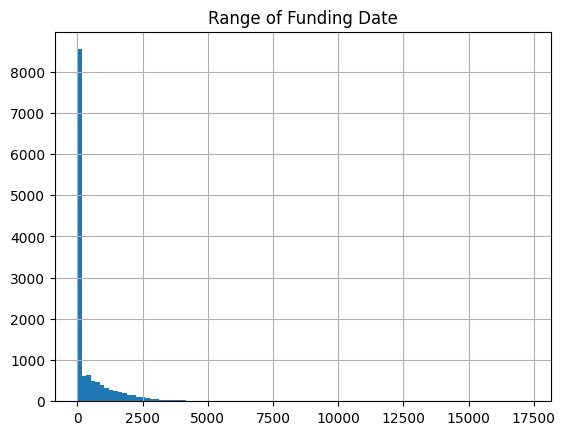

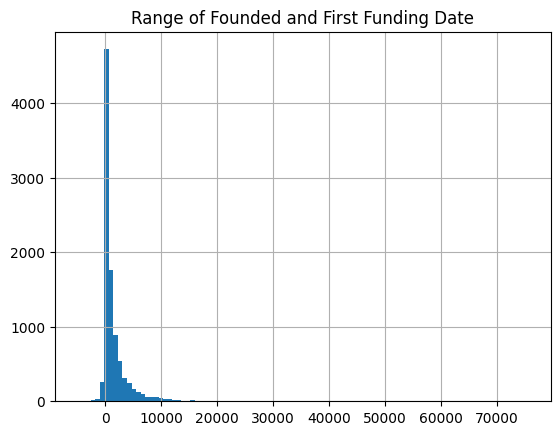

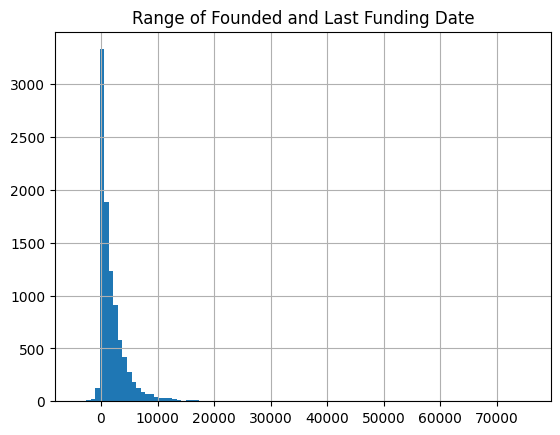

In [33]:
# Last - First Funding
(temp_df['last_funding_at'] - temp_df['first_funding_at']).astype('timedelta64[D]').hist(bins=100)
plt.title('Range of Funding Date')

plt.show()

# First Funding - Founded Date
(temp_df['first_funding_at'] - temp_df['founded_at']).astype('timedelta64[D]').hist(bins=100)
plt.title('Range of Founded and First Funding Date')

plt.show()

# Last Funding - Founded Date
(temp_df['last_funding_at'] - temp_df['founded_at']).astype('timedelta64[D]').hist(bins=100)
plt.title('Range of Founded and Last Funding Date')

plt.show()

### Categorical Data

In [34]:
cat_data = raw_data.select_dtypes(include=object)

cat_data.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,success,USA,CA,SF Bay Area,Cupertino,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,success,USA,WA,Seattle,Seattle,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,success,USA,CA,SF Bay Area,San Francisco,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,success,USA,CA,SF Bay Area,San Francisco,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,success,USA,NY,New York City,New York,2000-01-01,2010-03-08,2010-03-08


### Check Uniqueness of the Data

In [35]:
cat_data.nunique()

permalink           13330
name                13321
homepage_url        12096
category_list        5745
status                  2
country_code           84
state_code            209
region                595
city                 1711
founded_at           1637
first_funding_at     3789
last_funding_at      3666
dtype: int64

That's a lot of unique values! Lets just drop the permalink, name, and hompeage_url because these columns almost unique, so there is no point to plot the distribution.
<br>

Next, lets **inspect each the category_list because it look like it has too many unique value.**

### category_list

In [36]:
count_categories = cat_data['category_list'].value_counts()

count_categories

Software                                                            917
Biotechnology                                                       807
Curated Web                                                         373
Mobile                                                              272
Enterprise Software                                                 247
                                                                   ... 
Networking|Technology|Web Hosting                                     1
E-Commerce|Facebook Applications                                      1
Collaborative Consumption|E-Commerce|Marketplaces|Tourism|Travel      1
Apps|Internet                                                         1
Facebook Applications|Games|Networking|Technology                     1
Name: category_list, Length: 5745, dtype: int64

As we can see, **startup that has multiple categories treated as unique, we will manipulate the multiple category_list in data preprocessing then include it in our machine learning pipeline.**
<br>
We can see a pattern here, it consider multiple categories when '|' appears, so lets find these values

In [37]:
mul_categories = count_categories.index.str.replace('|', ',').str.contains(',')

mul_categories

/tmp/ipykernel_27369/235368749.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mul_categories = count_categories.index.str.replace('|', ',').str.contains(',')


array([False, False, False, ...,  True,  True,  True])

In [38]:
single_categories = count_categories[~mul_categories]

single_categories

Software               917
Biotechnology          807
Curated Web            373
Mobile                 272
Enterprise Software    247
                      ... 
Trading                  1
Clinical Trials          1
Smart Grid               1
Bitcoin                  1
Developer APIs           1
Name: category_list, Length: 214, dtype: int64

## EDA Conclusion

Lets wrap it up:
1. SInce our objective is predict if startup success or not (ipo, acquired, closed), **we drop the 'operating' status.**
2. **There are suspectible duplicate startup data, however permalink treat it as unique**, so lets assume these startups with the same name is unique.
3. The funding_total_usd contains outliers (the lower bound one), since **it doesn't make any sense for someone to fund a startup by just 2 usd, so we use threshold 1000 usd for funding_total_usd.**
4. **Some startups have multiple categories in category_list**, we will transform it in data preprocessing later before do machine learning modeling.

# Data Preprocessing

Since **the permalink and name is almost unique, we can drop these features.**

In [39]:
data = raw_data.drop(['permalink', 'name'], axis=1).reset_index(drop=True)

data

,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000.0,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
1,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000.0,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
2,http://1000memories.com,Curated Web,2535000.0,success,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
3,http://www.100plus.com,Analytics,1250000.0,success,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
4,http://www.1010data.com,Software,35000000.0,success,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...
13325,http://www.zyncro.com,Cloud Computing|Enterprise 2.0|Enterprise Soft...,3805520.0,success,ESP,56,Barcelona,Barcelona,2,2009-09-01,2011-04-05,2012-02-03
13326,http://zynerba.com,Pharmaceuticals,13000000.0,success,USA,PA,Philadelphia,Radnor,1,2014-01-01,2014-10-14,2014-10-14
13327,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,866550786.0,success,USA,CA,SF Bay Area,San Francisco,9,2007-07-01,2007-01-01,2011-02-18
13328,http://www.zyraz.com,Biotechnology,15419877.0,fail,MYS,14,MYS - Other,Damansara New Village,4,1994-01-01,2008-01-01,2013-02-15


## Data Split

In [40]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(
    data.drop('status', axis=1),
    data[['status']],
    test_size=0.2,
    random_state=69
)

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=69
)

In [41]:
X_train.head()

,homepage_url,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
5399,http://www.ilike.com/,Artists Globally|Social Media,16500000.0,USA,WA,Seattle,Seattle,3,2012-04-28,2002-01-01,2006-01-01
8282,http://www.openair.com,Software,16000000.0,USA,MA,Boston,Boston,1,1999-01-01,2000-01-01,2000-01-01
6398,https://www.lendvo.com,NaN,1325000.0,NaN,NaN,NaN,NaN,1,2015-06-23,2015-06-23,2015-06-23
2645,http://www.complete.ie,Web Hosting,5630000.0,NaN,NaN,NaN,NaN,1,2001-01-01,2007-09-24,2007-09-24
4711,http://www.glossybox.com,Beauty|Communities|E-Commerce,NaN,DEU,16,Berlin,Berlin,2,2011-01-01,2011-02-15,2011-05-31


## Categorical Pipeline

### homepage_url Pipeline

In [42]:
# protocol url
protocol_raw = X_train['homepage_url'].str.split(':').str[0]
valid_protocol = protocol_raw.value_counts().index

# domain url
dom_raw = X_train['homepage_url'].str.split('.', n=2).str[-1].str.split('/').str[0]
valid_dom = dom_raw.value_counts()[dom_raw.value_counts() > 4].index

We will extract the domain and protocol url (http/https) from homepage_url.

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

class UrlTrans(BaseEstimator, TransformerMixin):
    def __init__(self, protocol, domain):
        self.protocol = protocol
        self.domain = domain
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        protocol_raw = X['homepage_url'].str.split(':').str[0]
        
        protocol_invalid_index = (~protocol_raw.str.fullmatch('|'.join(self.protocol)).astype(bool))
        protocol_raw[protocol_invalid_index] = None
        
        dom_raw = X['homepage_url'].str.split('.', n=2).str[-1].str.split('/').str[0]
        dom_invalid_index = (~dom_raw.str.fullmatch('|'.join(self.domain)).astype(bool))
        dom_raw[dom_invalid_index] = None
        
        X['protocol_url'] = protocol_raw
        X['domain_url'] = dom_raw
        
        return X.drop('homepage_url', axis=1)

### category_list Pipeline

In [44]:
class CatTrans(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['category_list'] = X['category_list'].fillna('Others').str.split('|')
        
        return X

### Date Pipeline

We will separate our date into year, month, and date

In [45]:
'''
class RangeDate(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        for item in (['founded_at', 'first_funding_at', 'last_funding_at']):
            temp_date = pd.to_datetime(X[item], errors='coerce')
            
            X[item] = temp_date
            
        X['range_fund'] = (temp_df['last_funding_at'] - temp_df['first_funding_at']).astype('timedelta64[D]')
        X['range_founded'] = (temp_df['first_funding_at'] - temp_df['founded_at']).astype('timedelta64[D]')
        
        return X
'''

class DateSeparator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        for item in (['founded_at', 'first_funding_at', 'last_funding_at']):
            temp_date = pd.to_datetime(X[item], errors='coerce')
            
            X[f'day_{item}'] = temp_date.dt.day
            X[f'month_{item}'] = temp_date.dt.month
            X[f'year_{item}'] = temp_date.dt.year
            
        return X

### Categorical Transformation

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer

cat_trans = make_pipeline(
    UrlTrans(valid_protocol, valid_dom),
    CatTrans(),
    DateSeparator()
)

cat_trans

Pipeline(steps=[('urltrans',
                 UrlTrans(domain=Index(['com', 'net', 'ru', 'co', 'io', 'de', 'org', 'co.uk', 'com.br', 'me',
       'tv', 'us', 'in', 'fr', 'ca', 'jp', 'it', 'com.au', 'fm', 'nl', 'cn',
       'se', 'uk', 'eu', 'com.cn', 'es', 'pl', 'mobi', 'ch', 'cc', 'ag', 'no',
       'ly', 'info', 'co.jp', 'au', 'cz'],
      dtype='object'),
                          protocol=Index(['http', 'https'], dtype='object'))),
                ('cattrans', CatTrans()), ('dateseparator', DateSeparator())])

### Multi Labet Encoder

In [47]:
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = MultiLabelBinarizer(*args, **kwargs)
        
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    
    def transform(self, x, y=0):
        return self.encoder.transform(x)

class DfToSeries(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.iloc[:, 0]
    
multi_label = make_pipeline(
    DfToSeries(),
    MyLabelBinarizer()
)

multi_label

Pipeline(steps=[('dftoseries', DfToSeries()),
                ('mylabelbinarizer',
                 <__main__.MyLabelBinarizer object at 0x7f3bba8263d0>)])

### Date Encoder

In [48]:
date_column = []

for item in (['founded_at', 'first_funding_at', 'last_funding_at']):
    for i in (['day', 'month', 'year']):
        date_column.append(f'{i}_{item}')
        
date_column

['day_founded_at',
 'month_founded_at',
 'year_founded_at',
 'day_first_funding_at',
 'month_first_funding_at',
 'year_first_funding_at',
 'day_last_funding_at',
 'month_last_funding_at',
 'year_last_funding_at']

### Date Transformation

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

date_range_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

date_pipeline = ColumnTransformer([
    ('Date Category', SimpleImputer(strategy='most_frequent'), date_column[2:]),
    ('Date Numeric', date_range_pipeline, date_column[:2])
])

date_pipeline

ColumnTransformer(transformers=[('Date Category',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['year_founded_at', 'day_first_funding_at',
                                  'month_first_funding_at',
                                  'year_first_funding_at',
                                  'day_last_funding_at',
                                  'month_last_funding_at',
                                  'year_last_funding_at']),
                                ('Date Numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['day_founded_at', 'month_founded_at'])])

### Categorical Encoder

In [50]:
encoder_trans = ColumnTransformer([
    ('Multi Label Binarizer', multi_label, ['category_list']),
    ('One Hot Encoder', OneHotEncoder(handle_unknown='ignore'), ['country_code', 'state_code', 'city', 'protocol_url', 'domain_url']),
    ('Date Pipeline', date_pipeline, date_column)
])

encoder_trans

ColumnTransformer(transformers=[('Multi Label Binarizer',
                                 Pipeline(steps=[('dftoseries', DfToSeries()),
                                                 ('mylabelbinarizer',
                                                  <__main__.MyLabelBinarizer object at 0x7f3bba8263d0>)]),
                                 ['category_list']),
                                ('One Hot Encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['country_code', 'state_code', 'city',
                                  'protocol_url', 'domain_url']),
                                ('Date Pipeline',
                                 ColumnTransformer(tra...
                                                                  'Numeric',
                                                                  Pipeline(steps=[('simpleimputer',
                                                                                   SimpleImputer(strategy='median')),
                                                                                  ('standardscaler',
                                                                                   StandardScaler())]),
                                                                  ['day_founded_at',
                                                                   'month_founded_at'])]),
                                 ['day_founded_at', 'month_founded_at',
                                  'year_founded_at', 'day_first_funding_at',
                                  'month_first_funding_at',
                                  'year_first_funding_at',
                                  'day_last_funding_at',
                                  'month_last_funding_at',
                                  'year_last_funding_at'])])

### Full Categorical Pipeline

In [51]:
cat_pipeline = make_pipeline(
    cat_trans,
    encoder_trans
)

cat_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('urltrans',
                                  UrlTrans(domain=Index(['com', 'net', 'ru', 'co', 'io', 'de', 'org', 'co.uk', 'com.br', 'me',
       'tv', 'us', 'in', 'fr', 'ca', 'jp', 'it', 'com.au', 'fm', 'nl', 'cn',
       'se', 'uk', 'eu', 'com.cn', 'es', 'pl', 'mobi', 'ch', 'cc', 'ag', 'no',
       'ly', 'info', 'co.jp', 'au', 'cz'],
      dtype='object'),
                                           protocol=Index(['http', 'https'], dtype='objec...
                                                                                   'Numeric',
                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                    SimpleImputer(strategy='median')),
                                                                                                   ('standardscaler',
                                                                                                    StandardScaler())]),
                                                                                   ['day_founded_at',
                                                                                    'month_founded_at'])]),
                                                  ['day_founded_at',
                                                   'month_founded_at',
                                                   'year_founded_at',
                                                   'day_first_funding_at',
                                                   'month_first_funding_at',
                                                   'year_first_funding_at',
                                                   'day_last_funding_at',
                                                   'month_last_funding_at',
                                                   'year_last_funding_at'])]))])

## Numerical Pipeline

In [52]:
num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

## Full Pipeline

In [53]:
cat_columns = X_train.select_dtypes(include=object).columns
num_columns = X_train.select_dtypes(exclude=object).columns

In [54]:
from sklearn.decomposition import PCA

full_trans = ColumnTransformer([
    ('Categorical Pipeline', cat_pipeline, cat_columns),
    ('Numerical Pipeline', num_pipeline, num_columns)    
])

full_pipeline = make_pipeline(
    full_trans,
    PCA(n_components=128)
)

full_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Categorical Pipeline',
                                                  Pipeline(steps=[('pipeline',
                                                                   Pipeline(steps=[('urltrans',
                                                                                    UrlTrans(domain=Index(['com', 'net', 'ru', 'co', 'io', 'de', 'org', 'co.uk', 'com.br', 'me',
       'tv', 'us', 'in', 'fr', 'ca', 'jp', 'it', 'com.au', 'fm', 'nl', 'cn',
       'se', 'uk', 'eu', 'com.cn', 'es', 'pl', 'mobi', 'ch', 'cc', 'ag', 'no'...
                                                  Index(['homepage_url', 'category_list', 'country_code', 'state_code', 'region',
       'city', 'founded_at', 'first_funding_at', 'last_funding_at'],
      dtype='object')),
                                                 ('Numerical Pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['funding_total_usd', 'funding_rounds'], dtype='object'))])),
                ('pca', PCA(n_components=128))])

### Target Pipeline

In [55]:
from sklearn.preprocessing import OrdinalEncoder

target_pipeline = OrdinalEncoder()

target_pipeline

OrdinalEncoder()

## Data Transformation

In [56]:
full_pipeline.fit(X_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Categorical Pipeline',
                                                  Pipeline(steps=[('pipeline',
                                                                   Pipeline(steps=[('urltrans',
                                                                                    UrlTrans(domain=Index(['com', 'net', 'ru', 'co', 'io', 'de', 'org', 'co.uk', 'com.br', 'me',
       'tv', 'us', 'in', 'fr', 'ca', 'jp', 'it', 'com.au', 'fm', 'nl', 'cn',
       'se', 'uk', 'eu', 'com.cn', 'es', 'pl', 'mobi', 'ch', 'cc', 'ag', 'no'...
                                                  Index(['homepage_url', 'category_list', 'country_code', 'state_code', 'region',
       'city', 'founded_at', 'first_funding_at', 'last_funding_at'],
      dtype='object')),
                                                 ('Numerical Pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['funding_total_usd', 'funding_rounds'], dtype='object'))])),
                ('pca', PCA(n_components=128))])

In [57]:
cat_trans.fit(X_train)

Pipeline(steps=[('urltrans',
                 UrlTrans(domain=Index(['com', 'net', 'ru', 'co', 'io', 'de', 'org', 'co.uk', 'com.br', 'me',
       'tv', 'us', 'in', 'fr', 'ca', 'jp', 'it', 'com.au', 'fm', 'nl', 'cn',
       'se', 'uk', 'eu', 'com.cn', 'es', 'pl', 'mobi', 'ch', 'cc', 'ag', 'no',
       'ly', 'info', 'co.jp', 'au', 'cz'],
      dtype='object'),
                          protocol=Index(['http', 'https'], dtype='object'))),
                ('cattrans', CatTrans()), ('dateseparator', DateSeparator())])

In [58]:
target_pipeline.fit(y_train)

OrdinalEncoder()

In [59]:
target_pipeline.categories_

[array(['fail', 'success'], dtype=object)]

In [60]:
X_train_trans, X_val_trans, X_test_trans = full_pipeline.transform(X_train), full_pipeline.transform(X_val), full_pipeline.transform(X_test)

y_train_trans, y_val_trans, y_test_trans = target_pipeline.transform(y_train), target_pipeline.transform(y_val), target_pipeline.transform(y_test)

/home/alfian/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Cloud-Based Music', 'EDA Tools', 'Edutainment', 'Financial Exchanges', 'Gift Exchange', 'Governance', 'Graphic Design', 'Green Building', 'Hedge Funds', 'Local Commerce', 'Local Coupons', 'Mobile Search', 'Moneymaking', 'Operating Systems', 'Q&A', 'Recreation', 'Resorts', 'Self Storage', 'Social Activists', 'Teaching STEM Concepts', 'Video Processing'] will be ignored
  warnings.warn(
/home/alfian/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Angels', 'Animal Feed', 'Baby Boomers', 'Casual Games', 'Charter Schools', 'Comics', 'Debt Collecting', 'Enterprise Resource Planning', 'Enterprise Search', 'Estimation and Quoting', 'Governance', 'Graphic Design', 'HDTV', 'Hedge Funds', 'Independent Music Labels', 'Indians', 'Industrial Energy Efficiency', 'Internet Technology', 'Landscaping', 'Local Coupons', 'Lotteries

In [61]:
y_train_trans, y_val_trans, y_test_trans = y_train_trans.ravel(), y_val_trans.ravel(), y_test_trans.ravel()

In [62]:
X_train_trans.shape

(7998, 128)

# Modeling

## Baseline

In [63]:
from sklearn.dummy import DummyClassifier

most_freq = DummyClassifier(strategy='most_frequent')
random_guess = DummyClassifier(strategy='uniform', random_state=42)

most_freq.fit(X_train_trans, y_train_trans)
random_guess.fit(X_train_trans, y_train_trans)

print(f'''
    Baseline
    
    Based on most frequent target (Accuracy): {most_freq.score(X_test_trans, y_test_trans)}
    Based on random guess (Accuracy): {random_guess.score(X_test_trans, y_test_trans)}
''')


    Baseline
    
    Based on most frequent target (Accuracy): 0.5438859714928732
    Based on random guess (Accuracy): 0.518754688672168



## Logistic Regression

In [64]:
%%time
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train_trans, y_train_trans)

CPU times: user 784 ms, sys: 400 ms, total: 1.18 s
Wall time: 328 ms


/home/alfian/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [65]:
from sklearn.metrics import roc_auc_score, confusion_matrix

lr_predict = lr_model.predict(X_val_trans)

lr_roc = roc_auc_score(
    y_val_trans,
    lr_predict
)

lr_matrix = confusion_matrix(
    y_val_trans,
    lr_predict
)

print(f'''
Logistic Regression Evaluation

Accuracy Score:
{lr_model.score(X_val_trans, y_val_trans)}

ROC-AUC Score:
{lr_roc}

Confusion Matrix:
{lr_matrix}
''')


Logistic Regression Evaluation

Accuracy Score:
0.7145536384096024

ROC-AUC Score:
0.7119437106279213

Confusion Matrix:
[[ 837  423]
 [ 338 1068]]



## Random Forest

In [66]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_trans, y_train_trans)

CPU times: user 8.27 s, sys: 74.5 ms, total: 8.34 s
Wall time: 8.3 s


RandomForestClassifier(random_state=42)

In [67]:
rf_predict = rf_model.predict(X_val_trans)

rf_roc = roc_auc_score(
    y_val_trans,
    rf_predict
)

rf_matrix = confusion_matrix(
    y_val_trans,
    rf_predict
)

print(f'''
Random Forest Evaluation

Accuracy Score:
{rf_model.score(X_val_trans, y_val_trans)}

ROC-AUC Score:
{rf_roc}

Confusion Matrix:
{rf_matrix}
''')


Random Forest Evaluation

Accuracy Score:
0.7314328582145536

ROC-AUC Score:
0.7282762085393665

Confusion Matrix:
[[ 845  415]
 [ 301 1105]]



## Gradient Boosting

In [76]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train_trans, y_train_trans)

CPU times: user 42.6 s, sys: 118 ms, total: 42.7 s
Wall time: 43.8 s


GradientBoostingClassifier(random_state=42)

In [77]:
gb_predict = gb_model.predict(X_val_trans)

gb_roc = roc_auc_score(
    y_val_trans,
    gb_predict
)

gb_matrix = confusion_matrix(
    y_val_trans,
    gb_predict
)

print(f'''
Gradient Boosting Evaluation

Accuracy Score:
{gb_model.score(X_val_trans, y_val_trans)}

ROC-AUC Score:
{gb_roc}

Confusion Matrix:
{gb_matrix}
''')


Gradient Boosting Evaluation

Accuracy Score:
0.7426856714178545

ROC-AUC Score:
0.7403045903045903

Confusion Matrix:
[[ 878  382]
 [ 304 1102]]



## Neural Network

In [70]:
from tensorflow.keras import Sequential, layers

nn_model = Sequential([
    layers.Dense(1024, activation='sigmoid'),
    layers.Dense(3, activation='softmax')
])

2023-04-10 22:55:50.091387: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 22:55:50.196635: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 22:55:50.197398: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 22:55:51.054834: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [71]:
from tensorflow.keras import optimizers

nn_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.00005),
    metrics='accuracy'
)

In [72]:
from tensorflow.keras import callbacks

fit_hist = nn_model.fit(
    X_train_trans,
    y_train_trans,
    epochs=200,
    validation_data=[X_val_trans, y_val_trans],
    callbacks=[
        callbacks.EarlyStopping(patience=20, restore_best_weights=True)
    ]
)

Epoch 1/200
250/250 [==============================] - 2s 4ms/step - loss: 0.6891 - accuracy: 0.6580 - val_loss: 0.6055 - val_accuracy: 0.6969
Epoch 2/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5876 - accuracy: 0.7043 - val_loss: 0.5753 - val_accuracy: 0.7142
Epoch 3/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5690 - accuracy: 0.7136 - val_loss: 0.5631 - val_accuracy: 0.7191
Epoch 4/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5579 - accuracy: 0.7203 - val_loss: 0.5554 - val_accuracy: 0.7191
Epoch 5/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5511 - accuracy: 0.7242 - val_loss: 0.5519 - val_accuracy: 0.7232
Epoch 6/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5460 - accuracy: 0.7271 - val_loss: 0.5484 - val_accuracy: 0.7243
Epoch 7/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5425 - accuracy: 0.7303 - val_loss: 0.5441 - val_accuracy: 0.7251

Epoch 58/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5184 - accuracy: 0.7386 - val_loss: 0.5337 - val_accuracy: 0.7292
Epoch 59/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5176 - accuracy: 0.7389 - val_loss: 0.5336 - val_accuracy: 0.7266
Epoch 60/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5179 - accuracy: 0.7394 - val_loss: 0.5327 - val_accuracy: 0.7273
Epoch 61/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5179 - accuracy: 0.7403 - val_loss: 0.5346 - val_accuracy: 0.7236
Epoch 62/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5172 - accuracy: 0.7414 - val_loss: 0.5344 - val_accuracy: 0.7269
Epoch 63/200
250/250 [==============================] - 1s 5ms/step - loss: 0.5181 - accuracy: 0.7403 - val_loss: 0.5327 - val_accuracy: 0.7243
Epoch 64/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5172 - accuracy: 0.7419 - val_loss: 0.5335 - val_accuracy:

<Axes: >

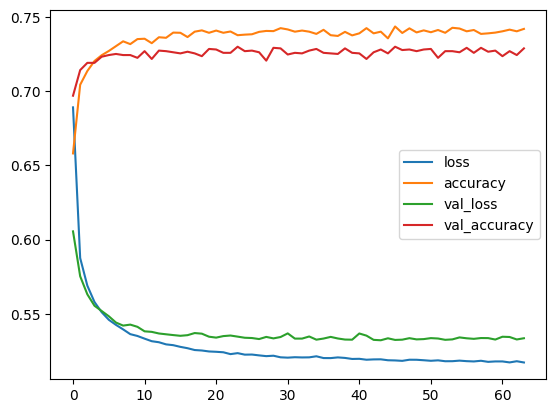

In [73]:
pd.DataFrame(fit_hist.history).plot()

In [74]:
nn_predict = nn_model.predict(X_val_trans).argmax(axis=-1)

nn_roc = roc_auc_score(
    y_val_trans,
    nn_predict
)
nn_matrix = confusion_matrix(
    y_val_trans,
    nn_predict
)

print(f'''
Neural Network Evaluation

Accuracy Score:
{nn_model.evaluate(X_val_trans, y_val_trans)[-1]}

ROC-AUC Score:
{nn_roc}

Confusion Matrix:
{nn_matrix}
''')

84/84 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.7281

Neural Network Evaluation

Accuracy Score:
0.7280570268630981

ROC-AUC Score:
0.7260233918128655

Confusion Matrix:
[[ 868  392]
 [ 333 1073]]



## Compare The Results

In [78]:
pd.DataFrame(
    [
        lr_model.score(X_val_trans, y_val_trans),
        rf_model.score(X_val_trans, y_val_trans),
        gb_model.score(X_val_trans, y_val_trans),
        nn_model.evaluate(X_val_trans, y_val_trans)[1]
    ],
    index=['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network'],
    columns=['Accuracy']
).sort_values(by='Accuracy', ascending=False)

84/84 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.7281


,Accuracy
Gradient Boosting,0.742686
Random Forest,0.731433
Neural Network,0.728057
Logistic Regression,0.714554


Gradient boosting model surpass other models, so we will consider this model for our final model, before that we will do hyperparameter tuning in order to improve the accuracy.